

**Задача: Создать модель классификации для предосказания того, есть ли у пациента признаки болезни сердца, в зависимости от физических характеристик этого человека (возраст, пол, холистерол и т.д.)**





Импортируем нужные библиотеки.

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Данные

В базе данных содержатся 14 атрибутов о физическом тестировании пациентов. Они сдают кровь и выполняют небольшой физический тест. Колонка "goal" указывает на наличие заболевания сердца у пациента - 0 означает заболевания нет, 1 означает заболевание есть. В общем случае, подтвердить на 100% заболевание сердца это очень инвазивный процесс, поэтому если мы сможем построить модель, которая достаточно точно оценивает вероятность заболевания, то это поможет избежать дорогих инвазивных процедур.

Содержимое

Информация об атрибутах:

* age - возраст
* sex - пол
* cp - chest pain - тип боли в груди (4 значения)
* trestbps - resting blood pressure - давление в состоянии покоя
* chol - уровень холистерина в крови, в mg/dl
* fbs - fasting blood sugar - уровень сахара в крови, > 120 mg/dl
* restecg - resting electrocardiographic results - результаты электрокардиограммы (значнеия 0,1,2)
* thalach - максимальный пульс
* exang - exercise induced angina - возникновение ангины в результате упражнений
* oldpeak = пиковые значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* slope - наклон пикового значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* ca - количество крупных сосудов (0-3), окрашенных флурозопией
* thal -  3 = нормально; 6 = фиксированный дефект; 7 = обратимый дефект
* target - 0 означает отсутствие заболевания сердца, 1 означает наличие заболевания сердца

Источник: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Читаем подготовленный файл.

In [112]:
df = pd.read_csv('heart.csv') # преобразовываем в датафрейм

In [113]:
df.head() # смотрим шапку датафреймя

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [114]:
df['target'].unique() # target - 0 означает отсутствие заболевания сердца, 1 означает наличие заболевания сердца
                      

array([1, 0], dtype=int64)

### Анализ данных и визуализация данных

In [115]:
df.info() # смотрим основную информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [116]:
df.isnull().sum() # Проверяем данные на отсутствующие значения.


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [117]:
df.describe().transpose() # анализируем основную статистику по всем числовым столбцам
                          # транспонируем датафрейм

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Визуализация данных

<Axes: xlabel='target', ylabel='count'>

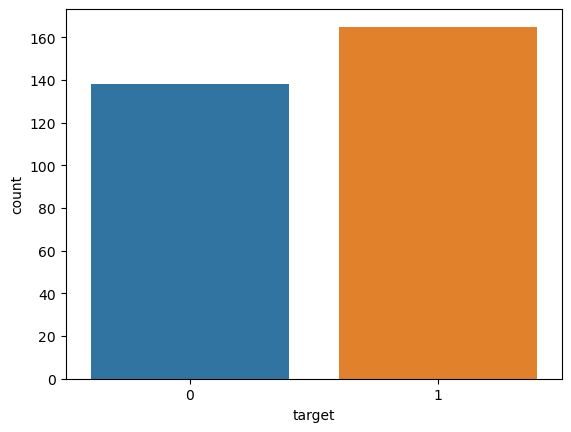

In [118]:
sns.countplot(data=df, x='target') # Countplot — это метод в библиотеке Seaborn, который используется для 
                                   #отображения количества категориальных наблюдений в каждой ячейке набора данных.

<Axes: >

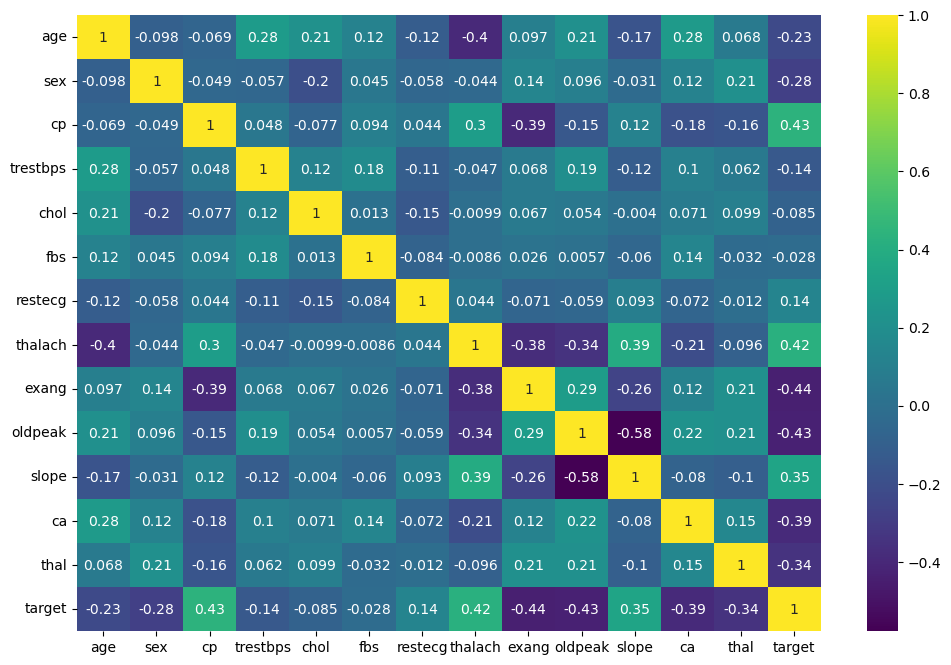

In [119]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)# Нарисуем график heatmap, показывающий корреляции между всеми колонками.


# Машинное обучение

## Разбиение на обучающий и тестовый наборы данных, а также масштабирование данных

In [120]:
# Напишите Ваш код здесь


In [121]:
#разделите все признаки на 2 объекта, X и y
X = df.drop('target',axis=1) # признаки
y = df['target'] # целевая переменная

In [122]:
from sklearn.model_selection import train_test_split #разделяет массивы или матрицы на случайные 
                                                     #подмножества для обучения и тестирования
from sklearn.preprocessing import StandardScaler # это метод масштабирования

In [123]:
#Разобьем данные на обучающий и тестовый наборы данных.
#Для тестовых данных используйте размер 10% .
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [124]:
# Напишите Ваш код здесь


In [125]:
scaler = StandardScaler()

In [126]:
# С помощью объекта StandardScaler нормализуем данные признаков в обучающем и тестовом наборах данных
scaled_X_train = scaler.fit_transform(X_train) # нормализуем данные и сразу обучаем
scaled_X_test = scaler.transform(X_test) # просто нормализуем

## Модель логистической регрессии

Создадим модель логистической регрессии, и с помощью кросс-валидации найдем хорошее значение значение C.
Я использую более простой способ с использованием LogisticRegressionCV

In [127]:
from sklearn.linear_model import LogisticRegressionCV
# LogisticRegressionCV — это реализация логистической регрессии с перекрестной проверкой (cross-validation) 
# из библиотеки scikit-learn. Она используется для классификации и регрессии. Эта модель выбирает коэффициенты 
# регуляризации на основе кросс-валидации, минимизируя таким образом переобучение.

In [128]:
log_model = LogisticRegressionCV() # создаем модель

In [129]:
log_model.fit(scaled_X_train,y_train) # обучаем модель на обучающей выборке

LogisticRegressionCV()

Отобразим результаты поиска оптимальных параметров, особенно значение C.


In [131]:
log_model.C_

array([0.04641589])

In [132]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

---------

## Оценка модели

Оценим работу модели на оставшихся 10% данных - тестовом наборе данных.

Подготовим следующие оценки:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [133]:
# Напишите Ваш код здесь


In [134]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [135]:
y_pred = log_model.predict(scaled_X_test) # сделаем прогноз на тестовом наборе данных 

In [136]:
confusion_matrix(y_test,y_pred) # создаем матрицу ошибок, 5 раз модель ошиблась из 31

array([[12,  3],
       [ 2, 14]], dtype=int64)

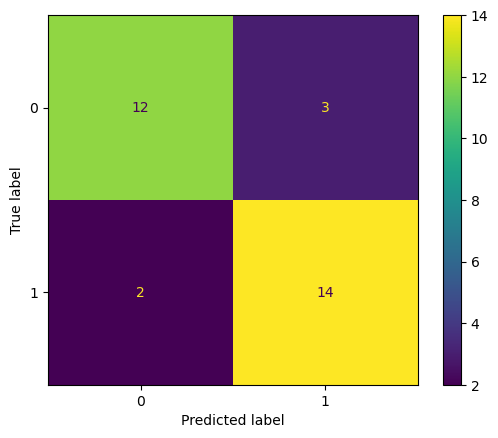

In [137]:
ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test) # нарисуем матрицу ошибку
                                                                      # 5 раз модель ошиблась из 31

In [138]:
print(classification_report(y_test,y_pred)) # отчет по модели
                                            # более 80 % случаев правильно

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



В офис клиники пришёл пациент со следующими значениями признаков:

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

Что предскажет модель для этого пациента? Есть ли здесь заболевание сердца? Насколько модель "уверена" в своём прогнозе?



In [139]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]] # создадим массив с указанными значениями

In [140]:
log_model.predict(scaler.transform(patient)) # модель предсказала отсутствие заболевания сердца

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [141]:
log_model.predict_proba(scaler.transform(patient)) # модель предсказала отсутствие заболевания сердца
                                                   # array([[0.94751173, 0.05248827]])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.94751173, 0.05248827]])